In [2]:
'''
KNN does not build any model. 
All the work is done during the test phase i.e. 
for every data point, k nearest neighbors are computed 
to make a prediction. 
Hence, it is called a lazy learning algorithm.


Elbow curve is used to find the optimal value 
of K for which the error is low.


kNN assumes that all the features are in the same scale and hence,
it is affected by the scale of features.


When the distance between 2 unscaled features is computed,
the contribution of the feature with high magnitude might be
high compared to the other having low magnitude. 
To overcome the problem of dominance of one feature over others, 
we scale down the features so that all the features contribute 
equally to the distance.



'''

'\nKNN does not build any model. \nAll the work is done during the test phase i.e. \nfor every data point, k nearest neighbors are computed \nto make a prediction. \nHence, it is called a lazy learning algorithm.\n\n\nElbow curve is used to find the optimal value \nof K for which the error is low.\n\n\nkNN assumes that all the features are in the same scale and hence,\nit is affected by the scale of features.\n\n\nWhen the distance between 2 unscaled features is computed,\nthe contribution of the feature with high magnitude might be\nhigh compared to the other having low magnitude. \nTo overcome the problem of dominance of one feature over others, \nwe scale down the features so that all the features contribute \nequally to the distance.\n\n\n\n'

# Intro to sklearn


In [3]:
'''
Uses:

 1. Preprocessing(module)
 
         Normalizing
         scaling
         Variable encoding
         categorical var into numbers = encoding
         
         from sklearn.preprocessor import MinMaxScaler
         
         MinMaxScaler - scales down all the variables data btw 0 and 1
         
 2. Model Selection(module)
 
         Train-test split
         Model Validation
         Parameter selection
         
         from sklearn.model_selection import train_test_split
         
         train_test_split - splits dataset into two parts
         
 3. Building a model
 
         Linear models
         Ensemble models
         Clustering
         
         from sklearn.linear_model import LinearRegression
         
         from sklearn.neighbours import KNeighboursRegressor
         
 4. Model Evaluation
 
         from sklearn.metrics import accuracy_score

'''

'\nUses:\n\n 1. Preprocessing(module)\n \n         Normalizing\n         scaling\n         Variable encoding\n         categorical var into numbers = encoding\n         \n         from sklearn.preprocessor import MinMaxScaler\n         \n         MinMaxScaler - scales down all the variables data btw 0 and 1\n         \n 2. Model Selection(module)\n \n         Train-test split\n         Model Validation\n         Parameter selection\n         \n         from sklearn.model_selection import train_test_split\n         \n         train_test_split - splits dataset into two parts\n         \n 3. Building a model\n \n         Linear models\n         Ensemble models\n         Clustering\n         \n         from sklearn.linear_model import LinearRegression\n         \n         from sklearn.neighbours import KNeighboursRegressor\n         \n 4. Model Evaluation\n \n         from sklearn.metrics import accuracy_score\n\n'

In [11]:
import pandas as pd

In [13]:
data = pd.read_csv('data_bigmart_sales.csv')

In [14]:
features = data.drop(['Item_Identifier','Item_Outlet_Sales'], axis=1)
target = data['Item_Outlet_Sales']

In [15]:
from sklearn.neighbors import KNeighborsRegressor as KNR

In [16]:
from sklearn.metrics import accuracy_score as acc

In [17]:
'''
sklearn cannot work with strings, 
all models doesnt support strings
and even cant use the missing values

'''

#Dealing with missing values

'''
Impute the missing values
Remove Categorical var
'''

'\nImpute the missing values\nRemove Categorical var\n'

# Missing values

In [18]:
#checking for missing values

data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [19]:
data['Item_Weight'].head(10)

0     9.300
1     5.920
2    17.500
3    19.200
4     8.930
5    10.395
6    13.650
7       NaN
8    16.200
9    19.200
Name: Item_Weight, dtype: float64

In [20]:
#imputing with the mean
mean_val = data['Item_Weight'].mean()
mean_val

data['Item_Weight'] = data['Item_Weight'].fillna( value = mean_val)
data['Item_Weight'].head(10)

0     9.300000
1     5.920000
2    17.500000
3    19.200000
4     8.930000
5    10.395000
6    13.650000
7    12.857645
8    16.200000
9    19.200000
Name: Item_Weight, dtype: float64

In [21]:
data['Outlet_Size'].head(10)

0    Medium
1    Medium
2    Medium
3       NaN
4      High
5    Medium
6      High
7    Medium
8       NaN
9       NaN
Name: Outlet_Size, dtype: object

In [22]:
# as they are categorical , imputing with mode

mode_val = data['Outlet_Size'].mode()
mode_val

data['Outlet_Size'] = data['Outlet_Size'].fillna( value = mode_val)
data['Outlet_Size'].head(10)

0    Medium
1    Medium
2    Medium
3       NaN
4      High
5    Medium
6      High
7    Medium
8       NaN
9       NaN
Name: Outlet_Size, dtype: object

In [23]:
data['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [24]:
data['Outlet_Size'].replace({'mode':'Medium'}, inplace=True)

In [25]:
data['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

# Categorical variables

In [26]:
#cate var 

data.dtypes


Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [27]:
#categorical var into numbers = encoding using get_dummies func

data['Outlet_Type'].value_counts()

pd.get_dummies(data['Outlet_Type'])


,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0
...,...,...,...,...
8518,0,1,0,0
8519,0,1,0,0
8520,0,1,0,0
8521,0,0,1,0


In [28]:
data['Outlet_Type'].value_counts()


Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [29]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [30]:
data = pd.get_dummies(data.drop(['Item_Identifier'], axis=1))

In [31]:
data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0


# KNN  Classification

In [32]:
# importing libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 
#this make the plot is displaced inside the notebook
import warnings
warnings.filterwarnings("ignore")


In [33]:
data = pd.read_csv('data_knn_classification_cleaned_titanic.csv')

#this is the cleaned version of titanic dataset
data.shape

(891, 25)

In [34]:
data.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


In [35]:
#checking for missing values

data.isnull().sum()

Survived      0
Age           0
Fare          0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Sex_female    0
Sex_male      0
SibSp_0       0
SibSp_1       0
SibSp_2       0
SibSp_3       0
SibSp_4       0
SibSp_5       0
SibSp_8       0
Parch_0       0
Parch_1       0
Parch_2       0
Parch_3       0
Parch_4       0
Parch_5       0
Parch_6       0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [36]:
# sepeartinng the independent and dependent var

x = data.drop(['Survived'], axis=1)
y = data['Survived']
x.shape, y.shape

((891, 24), (891,))

In [37]:
# scaling is important when we work with distance based alg

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[0.27117366, 0.01415106, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.4722292 , 0.13913574, 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.32143755, 0.01546857, 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.36792055, 0.04577135, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.32143755, 0.0585561 , 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.39683338, 0.01512699, 0.        , ..., 0.        , 1.        ,
        0.        ]])

In [38]:
x = pd.DataFrame(x_scaled, columns=x.columns)
x

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0.271174,0.014151,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.472229,0.139136,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.321438,0.015469,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.434531,0.103644,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.434531,0.015713,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.334004,0.025374,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
887,0.233476,0.058556,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
888,0.367921,0.045771,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
889,0.321438,0.058556,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [39]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, random_state=50, stratify= y)
train_x.shape, train_y.shape, test_x.shape, test_y.shape


((668, 24), (668,), (223, 24), (223,))

# Implementing KNN classifier

In [40]:
#importing KNN
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score,accuracy_score

In [41]:
#creating an instance of KNN
clf = KNN(n_neighbors=12)

#fitting the model
clf.fit(train_x, train_y)

#predicting over test set and cal f1 score and acc
test_predict = clf.predict(test_x)
k = f1_score(test_predict, test_y )
k1 =accuracy_score(test_predict, test_y)
k,k1

(0.7631578947368421, 0.8385650224215246)

# Elbow curve for classifier

In [42]:
def Elbow(k):
    #initializing empty list
    test_error = []
    
    #traning model for every value of k
    for i in k:
        clf = KNN(n_neighbors= i)

        #fitting the model
        clf.fit(train_x, train_y)

        #predicting over test set and cal f1 score and acc
        test_predict = clf.predict(test_x)
        l = f1_score(test_predict, test_y )
        error = 1-l
        test_error.append(error)
    return test_error

In [43]:
k = range(2,20,2)
test = Elbow(k)

Text(0.5, 1.0, 'elbow curve for test')

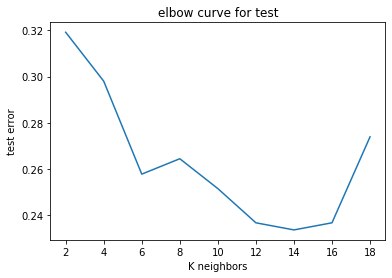

In [44]:
#plotting the curves
plt.plot(k, test)
plt.xlabel('K neighbors')
plt.ylabel('test error')
plt.title('elbow curve for test')

# KNN Regression


In [45]:
data = pd.read_csv('data_knn_regression_cleaned_bigmart_sales.csv')
data.shape

(8523, 46)

In [46]:
data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [47]:
data.isnull().sum()

#all categorical are encoded to numbers
#no missing values

Item_Weight                        0
Item_Visibility                    0
Item_MRP                           0
Outlet_Establishment_Year          0
Item_Outlet_Sales                  0
Item_Fat_Content_LF                0
Item_Fat_Content_Low Fat           0
Item_Fat_Content_Regular           0
Item_Fat_Content_low fat           0
Item_Fat_Content_reg               0
Item_Type_Baking Goods             0
Item_Type_Breads                   0
Item_Type_Breakfast                0
Item_Type_Canned                   0
Item_Type_Dairy                    0
Item_Type_Frozen Foods             0
Item_Type_Fruits and Vegetables    0
Item_Type_Hard Drinks              0
Item_Type_Health and Hygiene       0
Item_Type_Household                0
Item_Type_Meat                     0
Item_Type_Others                   0
Item_Type_Seafood                  0
Item_Type_Snack Foods              0
Item_Type_Soft Drinks              0
Item_Type_Starchy Foods            0
Outlet_Identifier_OUT010           0
O

In [49]:
# sepeartinng the independent and dependent var

x = data.drop(['Item_Outlet_Sales'], axis=1)
y = data['Item_Outlet_Sales']
x.shape, y.shape

((8523, 45), (8523,))

In [50]:
# scaling is important when we work with distance based alg

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[0.43559719, 0.04886645, 0.92750715, ..., 1.        , 0.        ,
        0.        ],
       [0.27728337, 0.05870508, 0.0720684 , ..., 0.        , 1.        ,
        0.        ],
       [0.81967213, 0.05103696, 0.46828841, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.49648712, 0.10714751, 0.22849221, ..., 1.        , 0.        ,
        0.        ],
       [0.33770492, 0.44221878, 0.30493925, ..., 0.        , 1.        ,
        0.        ],
       [0.69320843, 0.13666114, 0.18750976, ..., 1.        , 0.        ,
        0.        ]])

In [51]:
x = pd.DataFrame(x_scaled, columns = x.columns)
x

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.435597,0.048866,0.927507,0.583333,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.277283,0.058705,0.072068,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.819672,0.051037,0.468288,0.583333,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.899297,0.000000,0.640093,0.541667,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.418267,0.000000,0.095805,0.083333,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0.321546,0.172914,0.777729,0.083333,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
8519,0.392506,0.143069,0.326263,0.708333,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
8520,0.496487,0.107148,0.228492,0.791667,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
8521,0.337705,0.442219,0.304939,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [52]:
train_x, test_x, train_y, test_y = train_test_split(x, y, random_state=50)

# Implemting knn regressor

In [53]:
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_squared_error as MSE

In [54]:
#creating an instance of KNN
reg = KNN(n_neighbors = 5)

#fitting the model
reg.fit(train_x, train_y)

#predicting over the train set and cal MSE
test_predict = reg.predict(test_x)
k = MSE(test_predict, test_y)
k

1499874.446315781

In [55]:
#elbow curve

def Elbow(k):
    test_mse = []
    
    for i in k:
        reg = KNN(n_neighbors = i)
        reg.fit(train_x, train_y)
        test_predict = reg.predict(test_x)
        l=MSE(test_predict, test_y)
        test_mse.append(l)
    return test_mse

In [59]:
k = range(1, 40, 2)
test = Elbow(k)

ValueError: continuous is not supported

ValueError: x and y must have same first dimension, but have shapes (20,) and (9,)

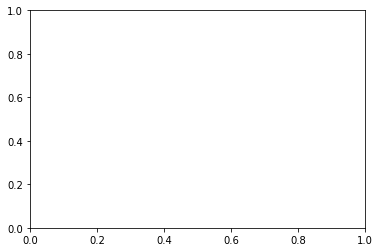

In [57]:
#plotting the curves
plt.plot(k, test)
plt.xlabel('K neighbors')
plt.ylabel('test mse')
plt.title('elbow curve for test')